<h1><bold>Scraping</bold></h1>

In [20]:
#Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib

In [21]:
#Import Request
## Usa `requests` para hacer una petición HTTP con el fin de recuperar datos que estén en esa URL
import requests

# Crea una instancia `BeautifulSoup` con esos datos
from bs4 import BeautifulSoup

<h4> Primera petición </h4>

In [22]:
url = "http://books.toscrape.com/"
# Aquí es donde hacemos una petición HTTP para obtener el HTML de la página web
response = requests.get(url)

# Y aquí es donde le damos ese HTML al Parser
soup = BeautifulSoup(response.content, "html.parser")

In [23]:
books_html = soup.find_all("article", class_="product_pod")
len(books_html)

20

## Parsing _one_ book

In [24]:
#Fragmento de HTML del primer libro
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [25]:
books_html[0].find("h3").find("a")

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [26]:
books_html[0].find("h3").find("a").attrs

{'href': 'catalogue/a-light-in-the-attic_1000/index.html',
 'title': 'A Light in the Attic'}

#Atributo

In [27]:
book_title = books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

#Precio

In [28]:
books_html[0].find("p", class_="price_color").string

'£51.77'

In [29]:
book_price = float(books_html[0].find("p", class_="price_color").string[1:])
book_price

51.77

#Rating

In [30]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [31]:
book_stars_html.attrs['class']

['star-rating', 'Three']

#Comprobar si esta en la lista

In [32]:
cities = [ 'paris', 'london', 'brussels' ]

if 'berlin' in cities:
    print("Berlin is available")
else:
    print("Sorry, berlin is not available")

Sorry, berlin is not available


In [33]:
def parse_rating(rating_classes):
    if 'One' in rating_classes:
        return 1
    elif 'Two' in rating_classes:
        return 2
    elif 'Three' in rating_classes:
        return 3
    elif 'Four' in rating_classes:
        return 4
    elif 'Five' in rating_classes:
        return 5
    else:
        return 0

In [34]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])

## Parsing _all_ books

In [35]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

In [36]:
for book in books_html:
    title = book.find("h3").find("a").attrs["title"]
    price = float(book.find("p", class_="price_color").text[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)

In [37]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [38]:
len(books_dict)         # You should have 3 dictionaries
len(books_dict["Title"]) # Each containing 20 elements from the 20 books, as many as on the web page!

20

<h3>Carga de datos en Pandas</h3>

In [39]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<Axes: xlabel='Rating'>

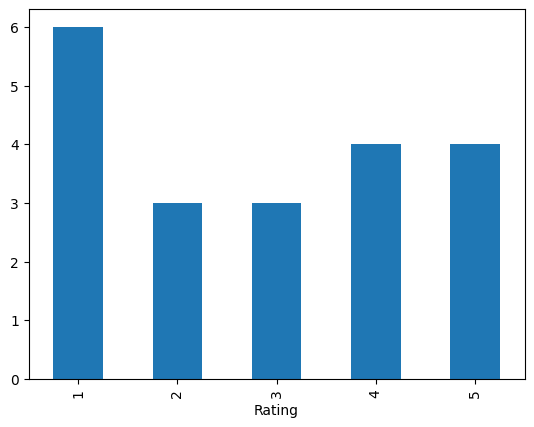

In [40]:
#Rating
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

<h4>Cómo pasar por todas las páginas del catálogo</h4>

In [41]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"
url

'http://books.toscrape.com/catalogue/page-1.html'

In [42]:
MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


In [43]:
#Todos los libros
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

MAX_PAGE = 30
for page in range(1, MAX_PAGE + 1):
    print(f"Parsing page {page}...")
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.find("h3").find("a").attrs["title"]
        price = float(book.find("p", class_="price_color").text[1:])
        rating = parse_rating(book.find("p", class_="star-rating").attrs["class"])
        all_books_dict["Title"].append(title)
        all_books_dict["Price"].append(price)
        all_books_dict["Rating"].append(rating)

print("Done!")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Parsing page 6...
Parsing page 7...
Parsing page 8...
Parsing page 9...
Parsing page 10...
Parsing page 11...
Parsing page 12...
Parsing page 13...
Parsing page 14...
Parsing page 15...
Parsing page 16...
Parsing page 17...
Parsing page 18...
Parsing page 19...
Parsing page 20...
Parsing page 21...
Parsing page 22...
Parsing page 23...
Parsing page 24...
Parsing page 25...
Parsing page 26...
Parsing page 27...
Parsing page 28...
Parsing page 29...
Parsing page 30...
Done!


In [44]:
len(all_books_dict["Title"])

600

In [45]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
595,The Grand Design,13.76,3
596,The Firm,45.56,3
597,The Fault in Our Stars,47.22,1
598,The False Prince (The Ascendance Trilogy #1),56.00,5
599,The Expatriates,44.58,2


<Axes: >

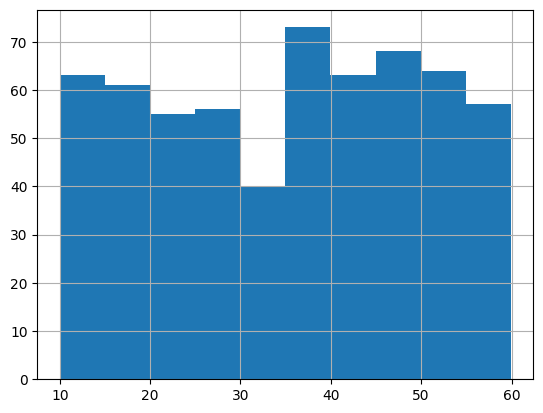

In [46]:
all_books_df["Price"].hist()

<Axes: xlabel='Rating'>

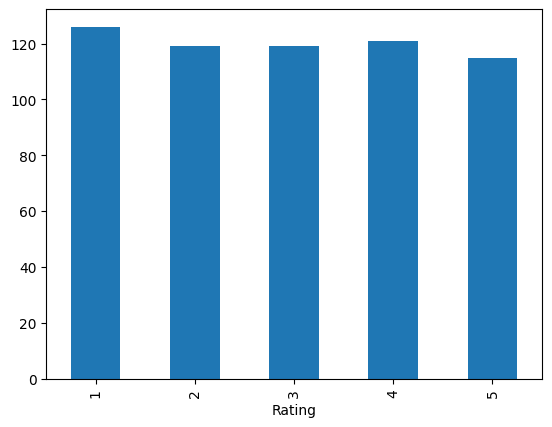

In [47]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

<h4>Cómo guardar los datos para usarlos más adelante</h4>

In [48]:
#Archivo csv
all_books_df.to_csv("books.csv")

In [54]:
#Excel
all_books_df.to_excel('books.xlsx', sheet_name='Books')

ModuleNotFoundError: No module named 'openpyxl'